Created: 2020.07.22

Modified: 2020.07.26

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import random
import pandas as pd
from pathlib import Path

import sys
sys.path.append('../functions')
import functions32 as f32

# 2D AXIAL

In [4]:
folder_path = Path('/data-10tb/shared/skull/axial-2d/')

df_full = pd.read_csv(folder_path/'bias_mask-test-val-axial-2d.csv')
print(df_full.shape)
#df_full.head()

(425766, 6)


#### Select part of the whole df

In [5]:
df = f32.split_data(df_full, pct_rand_both=0.003, nr_beg_both=None)
df.shape

Original df=425766:	train=983, val=294,	train+val=1277, df*pct_rand_both=1277.3


(1277, 6)

#### Create a DataBunch v.1

In [6]:
codes = np.loadtxt(folder_path/'codes.txt', dtype=str); codes

array(['background', 'brain'], dtype='<U10')

In [ ]:
#src = SegmentationItemList.from_df(df, folder_path, cols='bias_path').split_from_df(col='usage').label_from_df(cols='mask_full_path', classes=codes)

In [7]:
src = SegmentationItemList.from_df(df, folder_path, cols='bias_path')\
                            .split_from_df(col='usage')\
                            .label_from_df(cols='mask_full_path', classes=codes)

In [8]:
src

LabelLists;

Train: LabelList (983 items)
x: SegmentationItemList
Image (3, 176, 256),Image (3, 172, 218),Image (3, 176, 256),Image (3, 176, 256),Image (3, 176, 256)
y: SegmentationLabelList
ImageSegment (1, 176, 256),ImageSegment (1, 172, 218),ImageSegment (1, 176, 256),ImageSegment (1, 176, 256),ImageSegment (1, 176, 256)
Path: /data-10tb/shared/skull/axial-2d;

Valid: LabelList (294 items)
x: SegmentationItemList
Image (3, 180, 240),Image (3, 175, 240),Image (3, 201, 241),Image (3, 199, 240),Image (3, 180, 240)
y: SegmentationLabelList
ImageSegment (1, 180, 240),ImageSegment (1, 175, 240),ImageSegment (1, 201, 241),ImageSegment (1, 199, 240),ImageSegment (1, 180, 240)
Path: /data-10tb/shared/skull/axial-2d;

Test: None

lista zestawu validacyjnego

LabelList (294 items)
x: SegmentationItemList
Image (3, 180, 240),Image (3, 175, 240),Image (3, 201, 241),Image (3, 199, 240),Image (3, 180, 240)
y: SegmentationLabelList
ImageSegment (1, 180, 240),ImageSegment (1, 175, 240),ImageSegment (1, 201, 241),ImageSegment (1, 199, 240),ImageSegment (1, 180, 240)
Path: /data-10tb/shared/skull/axial-2d
******************************

pierwszy element listy zestawu walidacyjnego
(Image (3, 180, 240), ImageSegment (1, 180, 240))
******************************

rozmiar obraz X z pierwszego elementu listy zestawu walidacyjnego
torch.Size([3, 180, 240])
******************************

obraz X z pierwszego elementu listy zestawu walidacyjnego



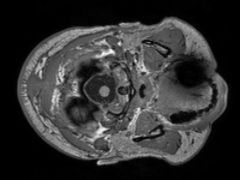

In [9]:
# src.list -> to obie listy, dla zestawu treningowego i validacyjnego
print('lista zestawu validacyjnego\n')
print(src.lists[1])
print (30*'*')
print()
print('pierwszy element listy zestawu walidacyjnego')
print(src.lists[1][0]) 
print (30*'*')
print()
print('rozmiar obraz X z pierwszego elementu listy zestawu walidacyjnego')
print(src.lists[1][0][0].shape)
print (30*'*')
print()
print('obraz X z pierwszego elementu listy zestawu walidacyjnego\n')
src.lists[1][0][0]

In [10]:
# src_size = np.array(src.lists[1][0][0].shape[1:])
# size = min(src_size) # oryg
# print(src_size)

In [11]:
size = 128
bs = 124

In [12]:
data = (src.transform(get_transforms(), size=size, tfm_y=True) 
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [13]:
data.train_ds[0]

(Image (3, 128, 128), ImageSegment (1, 128, 128))

In [14]:
# show_image(data.train_ds[1100][0])
# show_image(data.train_ds[1100][1])
# data.train_ds[1100][1].show()
# data.train_ds[1100][0].show()
# data.train_ds[1100][0]

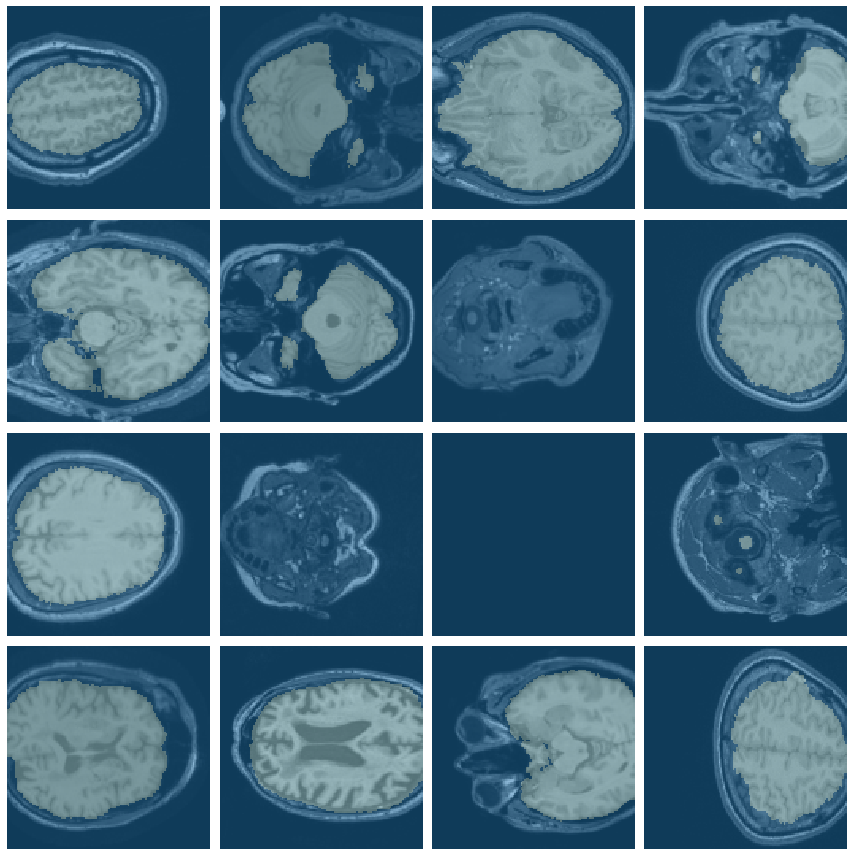

In [15]:
data.show_batch(4, figsize=(12,12))

## Second try to create DataBunch

#### Image List

In [16]:
# item list
il = SegmentationItemList.from_df(df, folder_path, cols='bias_path', convert_mode='L')

In [17]:
il

SegmentationItemList (1277 items)
Image (1, 176, 256),Image (1, 172, 218),Image (1, 176, 256),Image (1, 176, 256),Image (1, 176, 256)
Path: /data-10tb/shared/skull/axial-2d

In [18]:
il.items[0]

'/data-10tb/shared/skull/axial-2d//train/SALD/sub-031386_T1w.anat/T1_biascorr_iso_062.png'

In [19]:
defaults.cmap = 'gray'

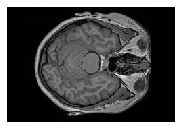

In [20]:
# przeskalowany??? (augumenatation)
il[0].show()

torch.Size([1, 176, 256])


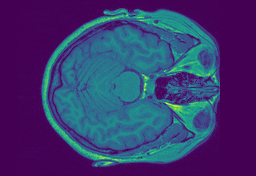

In [21]:
# oryginal???
print(il[0].shape)
il[0]

In [22]:
# split data
sd = il.split_from_df(col='usage')
sd

ItemLists;

Train: SegmentationItemList (983 items)
Image (1, 176, 256),Image (1, 172, 218),Image (1, 176, 256),Image (1, 176, 256),Image (1, 176, 256)
Path: /data-10tb/shared/skull/axial-2d;

Valid: SegmentationItemList (294 items)
Image (1, 180, 240),Image (1, 175, 240),Image (1, 201, 241),Image (1, 199, 240),Image (1, 180, 240)
Path: /data-10tb/shared/skull/axial-2d;

Test: None

In [23]:
# label list
ll = sd.label_from_df(cols='mask_full_path', classes=codes)

In [24]:
ll

LabelLists;

Train: LabelList (983 items)
x: SegmentationItemList
Image (1, 176, 256),Image (1, 172, 218),Image (1, 176, 256),Image (1, 176, 256),Image (1, 176, 256)
y: SegmentationLabelList
ImageSegment (1, 176, 256),ImageSegment (1, 172, 218),ImageSegment (1, 176, 256),ImageSegment (1, 176, 256),ImageSegment (1, 176, 256)
Path: /data-10tb/shared/skull/axial-2d;

Valid: LabelList (294 items)
x: SegmentationItemList
Image (1, 180, 240),Image (1, 175, 240),Image (1, 201, 241),Image (1, 199, 240),Image (1, 180, 240)
y: SegmentationLabelList
ImageSegment (1, 180, 240),ImageSegment (1, 175, 240),ImageSegment (1, 201, 241),ImageSegment (1, 199, 240),ImageSegment (1, 180, 240)
Path: /data-10tb/shared/skull/axial-2d;

Test: None

In [25]:
x,y = ll.train[0]

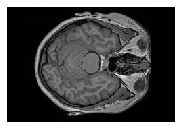

In [26]:
x.show()

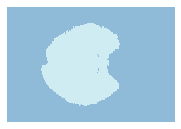

In [27]:
y.show()

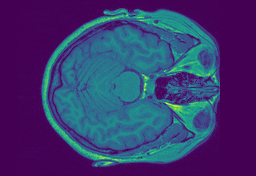

In [28]:
x

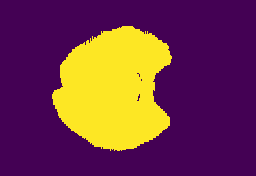

In [29]:
y

In [30]:
# orginalne wielkosci
print(x.shape, y.shape)

torch.Size([1, 176, 256]) torch.Size([1, 176, 256])


In [31]:
# transformed labeled list, 
# [] - not transform for a validation set
tmfs = ([*rand_pad(padding=3, size=128, mode='zeros')], [])
ll = ll.transform(tmfs, tfm_y=True)

In [32]:
bs=128
data = ll.databunch(bs=bs).normalize(imagenet_stats)

In [33]:
x,y = data.train_ds[0]

In [34]:
print(x.shape, y.shape)

torch.Size([1, 128, 128]) torch.Size([1, 128, 128])


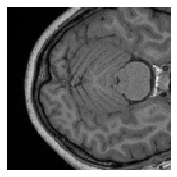

In [35]:
x.show()

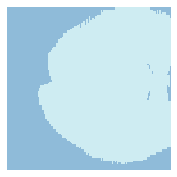

In [36]:
y.show()

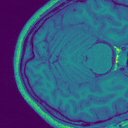

In [37]:
x

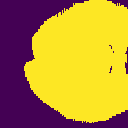

In [38]:
y

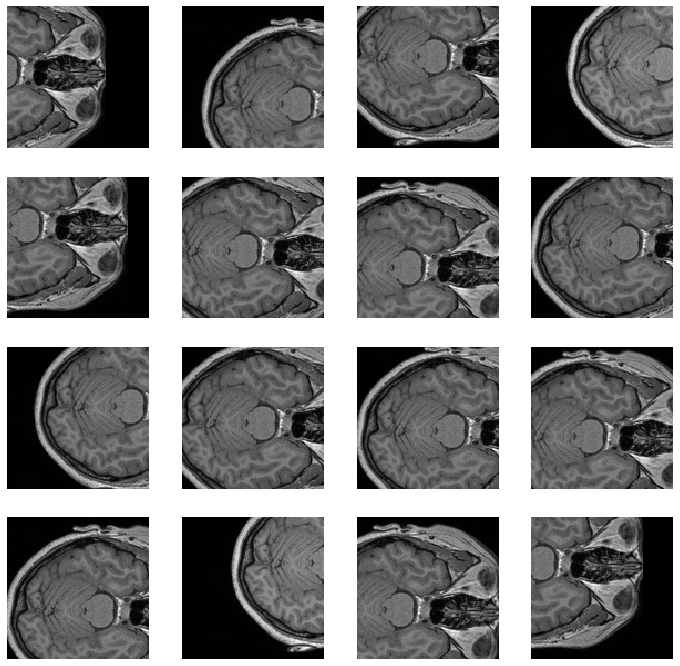

In [39]:
# load image[0][0] from a disc, and transform it on the fly!!! (the same image!!!)
def _plot(i,j,ax):data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 4,4, figsize=(12,12))

### get one batch

In [40]:
xb, yb = data.one_batch()

In [41]:
print(xb.shape, yb.shape)

torch.Size([128, 3, 128, 128]) torch.Size([128, 1, 128, 128])


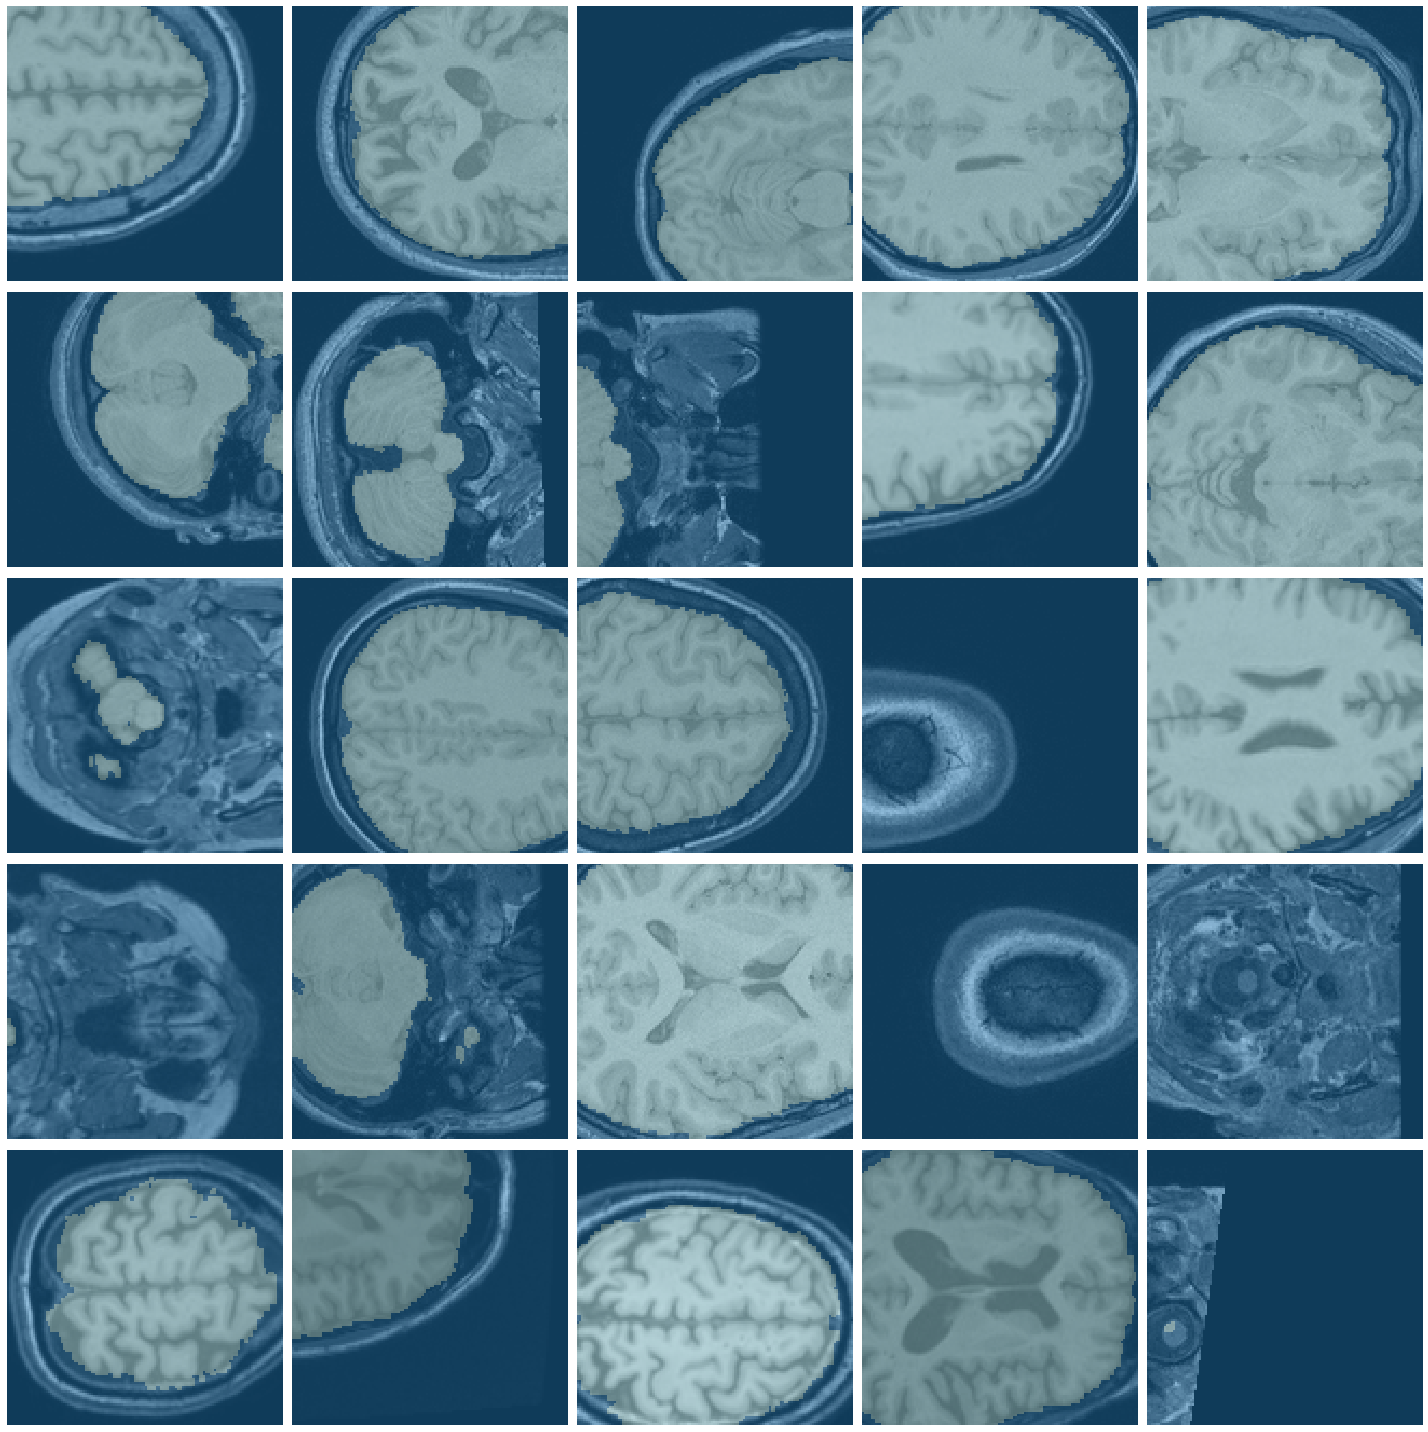

In [275]:
data.show_batch()

In [20]:
# show_image(data.train_ds[1100][0])
# show_image(data.train_ds[1100][1])
# data.train_ds[1100][1].show()
# data.train_ds[1100][0].show()
# data.train_ds[1100][0]